In [1]:
import numpy as np 
import pandas as pd

In [2]:
train = pd.read_csv('bigMartTrain.csv')
test = pd.read_csv('bigMartTest.csv')

In [3]:
print("Rows and Columns in training set:", train.shape)
print("Rows and Columns in testing set:", test.shape)

Rows and Columns in training set: (8523, 12)
Rows and Columns in testing set: (5681, 11)


In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [6]:
for col in train:
    val=train[col].isnull().sum()
    if val>0.0:
        print("Number of missing values in column ",col,":",val)

Number of missing values in column  Item_Weight : 1463
Number of missing values in column  Outlet_Size : 2410


In [7]:
for col in test:
    val=test[col].isnull().sum()
    if val>0.0:
        print("Number of missing values in column ",col,":",val)

Number of missing values in column  Item_Weight : 976
Number of missing values in column  Outlet_Size : 1606


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
print(train["Item_Fat_Content"].value_counts())
print(train["Item_Type"].value_counts())
print(train["Outlet_Identifier"].value_counts())
print(train["Outlet_Size"].value_counts())
print(train["Outlet_Location_Type"].value_counts())
print(train["Outlet_Type"].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocer

In [22]:
combine=[test, train]
content_mapping = {'Low Fat': 1, 'Regular': 2, 'LF': 3, 'reg': 4, 'low fat': 5}
item_mapping = {'Fruits and Vegetables': 1, 'Snack Foods': 2, 'Household': 3, 'Frozen Foods': 4, 'Dairy': 5, 'Canned':6, 'Baking Goods':7, 'Health and Hygiene':8, 'Soft Drinks':9, 'Meat':10, 'Breads':11, 'Hard Drinks':12, 'Others':13, 'Starchy Foods':14, 'Breakfast':15, 'Seafood':16}
outletIdentifier_mapping ={'OUT027': 27, 'OUT013': 13, 'OUT046': 46, 'OUT035': 35, 'OUT049': 49, 'OUT045':45, 'OUT018':18, 'OUT017':17, 'OUT010':10, 'OUT019':19}
outlet_mapping = {'High': 1, 'Medium': 2, 'Small': 3}
Location_mapping = {'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3}
Type_mapping = {'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3, 'Grocery Store':4}
for dataset in combine:
    dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].map(content_mapping)
    dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].fillna(0)
    dataset['Item_Type'] = dataset['Item_Type'].map(item_mapping)
    dataset['Item_Type'] = dataset['Item_Type'].fillna(0)
    dataset['Outlet_Size'] = dataset['Outlet_Size'].map(outlet_mapping)
    dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(0) 
    dataset['Outlet_Identifier'] = dataset['Outlet_Identifier'].map(outletIdentifier_mapping)
    dataset['Outlet_Identifier'] = dataset['Outlet_Identifier'].fillna(0)
    dataset['Outlet_Location_Type'] = dataset['Outlet_Location_Type'].map(Location_mapping)
    dataset['Outlet_Location_Type'] = dataset['Outlet_Location_Type'].fillna(0)
    dataset['Outlet_Type'] = dataset['Outlet_Type'].map(Type_mapping)
    dataset['Outlet_Type'] = dataset['Outlet_Type'].fillna(0)
    dataset['Item_Weight'] = dataset['Item_Weight'].fillna(0)

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0.0,0.016047,0.0,249.8092,0.0,1999,0.0,0.0,0.0,3735.1380
1,8,5.92,0.0,0.019278,0.0,48.2692,0.0,2009,0.0,0.0,0.0,443.4228
2,662,17.50,0.0,0.016760,0.0,141.6180,0.0,1999,0.0,0.0,0.0,2097.2700
3,1121,19.20,0.0,0.000000,0.0,182.0950,0.0,1998,0.0,0.0,0.0,732.3800
4,1297,8.93,0.0,0.000000,0.0,53.8614,0.0,1987,0.0,0.0,0.0,994.7052


In [23]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0.0,0.007565,0.0,107.8622,0.0,1999,0.0,0.0,0.0
1,1067,8.300,0.0,0.038428,0.0,87.3198,0.0,2007,0.0,0.0,0.0
2,1406,14.600,0.0,0.099575,0.0,241.7538,0.0,1998,0.0,0.0,0.0
3,809,7.315,0.0,0.015388,0.0,155.0340,0.0,2007,0.0,0.0,0.0
4,1184,0.000,0.0,0.118599,0.0,234.2300,0.0,1985,0.0,0.0,0.0


In [24]:
train["Item_Identifier"] = train["Item_Identifier"].astype('category')
train.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content              float64
Item_Visibility               float64
Item_Type                     float64
Item_MRP                      float64
Outlet_Identifier             float64
Outlet_Establishment_Year       int64
Outlet_Size                   float64
Outlet_Location_Type          float64
Outlet_Type                   float64
Item_Outlet_Sales             float64
dtype: object

In [25]:
#converting categorical data to numeric.
train["Item_Identifier"] = train["Item_Identifier"].cat.codes
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0.0,0.016047,0.0,249.8092,0.0,1999,0.0,0.0,0.0,3735.1380
1,8,5.92,0.0,0.019278,0.0,48.2692,0.0,2009,0.0,0.0,0.0,443.4228
2,662,17.50,0.0,0.016760,0.0,141.6180,0.0,1999,0.0,0.0,0.0,2097.2700
3,1121,19.20,0.0,0.000000,0.0,182.0950,0.0,1998,0.0,0.0,0.0,732.3800
4,1297,8.93,0.0,0.000000,0.0,53.8614,0.0,1987,0.0,0.0,0.0,994.7052


In [26]:
test["Item_Identifier"] = test["Item_Identifier"].astype('category')
test.dtypes

Item_Identifier              category
Item_Weight                   float64
Item_Fat_Content              float64
Item_Visibility               float64
Item_Type                     float64
Item_MRP                      float64
Outlet_Identifier             float64
Outlet_Establishment_Year       int64
Outlet_Size                   float64
Outlet_Location_Type          float64
Outlet_Type                   float64
dtype: object

In [27]:
#converting categorical data to numeric.
test["Item_Identifier"] = test["Item_Identifier"].cat.codes
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0.0,0.007565,0.0,107.8622,0.0,1999,0.0,0.0,0.0
1,1067,8.300,0.0,0.038428,0.0,87.3198,0.0,2007,0.0,0.0,0.0
2,1406,14.600,0.0,0.099575,0.0,241.7538,0.0,1998,0.0,0.0,0.0
3,809,7.315,0.0,0.015388,0.0,155.0340,0.0,2007,0.0,0.0,0.0
4,1184,0.000,0.0,0.118599,0.0,234.2300,0.0,1985,0.0,0.0,0.0


## Thus, we have successfully converted all the catagorical features into numeric. Now it's time to find correlation between various features.

In [28]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

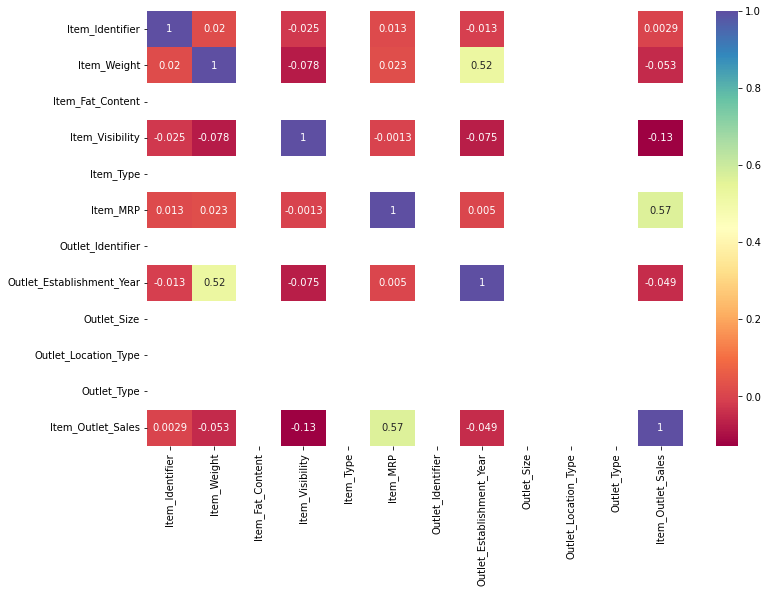

In [29]:
#Overall Correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.heatmap(train.corr(),annot=True,cmap="Spectral")
plt.show()

In [30]:
pd.crosstab(train['Outlet_Size'], train['Outlet_Identifier'])

Outlet_Identifier,0.0
Outlet_Size,
0.0,8523


In [32]:
pd.crosstab(train['Item_Weight'], train['Outlet_Establishment_Year'])

Outlet_Establishment_Year,1985,1987,1997,1998,1999,2002,2004,2007,2009
Item_Weight,,,,,,,,,
0.000,1463,0,0,0,0,0,0,0,0
4.555,0,1,1,0,1,0,1,0,0
4.590,0,1,1,0,1,1,1,0,0
4.610,0,0,1,1,1,1,1,1,1
4.615,0,1,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...
21.000,0,1,0,1,1,0,1,1,1
21.100,0,2,4,0,2,1,3,2,3
21.200,0,0,1,1,1,0,0,1,1


In [33]:
for row in train.itertuples(index=True, name='Pandas'):
    if row[9] is None:
        if(row[7]==10 or row[7]==17 or row[7]==45):
            train.loc[row.Index, 'Outlet_Size'] = 0
    else:
        if(row[7]==13):
            train.loc[row.Index, 'Outlet_Size'] =1
        else:
            if(row[7]==18 or row[7]==27 or row[7]==49):
                train.loc[row.Index, 'Outlet_Size'] =2
            else:
                if(row[7]==19 or row[7]==35 or row[7]==46):
                    train.loc[row.Index, 'Outlet_Size'] =3

In [34]:
for row in test.itertuples(index=True, name='Pandas'):
    if row[9] is None:
        if(row[7]==10 or row[7]==17 or row[7]==45):
            test.loc[row.Index, 'Outlet_Size'] = 0
    else:
        if(row[7]==13):
            test.loc[row.Index, 'Outlet_Size'] =1
        else:
            if(row[7]==18 or row[7]==27 or row[7]==49):
                test.loc[row.Index, 'Outlet_Size'] =2
            else:
                if(row[7]==19 or row[7]==35 or row[7]==46):
                    test.loc[row.Index, 'Outlet_Size'] =3

In [35]:
train['Item_Weight'].fillna(train['Item_Weight'].dropna().median(), inplace=True)

In [36]:
test['Item_Weight'].fillna(test['Item_Weight'].dropna().median(), inplace=True)

In [37]:
import sklearn.preprocessing as preprocess
X_train = preprocess.scale(train)
X_test = preprocess.scale(test)

In [38]:
mean_Identifier = train["Item_Identifier"].mean()
mean_Weight = train["Item_Weight"].mean()
mean_Fat_Content = train["Item_Fat_Content"].mean()
mean_Visibility = train["Item_Visibility"].mean()
mean_Type = train["Item_Type"].mean()
mean_MRP = train["Item_MRP"].mean()
mean_OIdentifier = train["Outlet_Identifier"].mean()
mean_Year = train["Outlet_Establishment_Year"].mean()
mean_Size = train["Outlet_Size"].mean()
mean_Location = train["Outlet_Location_Type"].mean()
mean_Type = train["Item_Type"].mean()

print(mean_Identifier)
print(mean_Weight)
print(mean_Fat_Content)
print(mean_Visibility)
print(mean_Type)
print(mean_MRP)
print(mean_OIdentifier)
print(mean_Year)
print(mean_Size)
print(mean_Location)
print(mean_Type)

779.714889123548
10.650589581133575
0.0
0.06613202877895127
0.0
140.9927819781768
0.0
1997.8318667135984
0.0
0.0
0.0


In [39]:
mean_vector = np.array([[mean_Identifier,mean_Weight,mean_Fat_Content,mean_Visibility,mean_Type,mean_MRP,mean_OIdentifier,mean_Year,mean_Size,mean_Location,mean_Type]])
print('Mean Vector:\n', mean_vector)
mean_vector.shape

Mean Vector:
 [[7.79714889e+02 1.06505896e+01 0.00000000e+00 6.61320288e-02
  0.00000000e+00 1.40992782e+02 0.00000000e+00 1.99783187e+03
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]


(1, 11)

In [40]:
X_train=np.array(train.drop("Item_Outlet_Sales", axis=1))

In [41]:
scatter_matrix = np.zeros((11,11))
for i in range(X_train.shape[0]):
    scatter_matrix += ((X_train[i,:].reshape(1,11) - mean_vector).T).dot(X_train[i,:].reshape(1,11)- mean_vector)
    #print(i)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 1.71974594e+09  4.87099293e+05  0.00000000e+00 -5.03350661e+03
   0.00000000e+00  3.06422107e+06  0.00000000e+00 -4.09327564e+05
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.87099293e+05  3.52549375e+05  0.00000000e+00 -2.19248613e+02
   0.00000000e+00  7.80271612e+04  0.00000000e+00  2.38874065e+05
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.03350661e+03 -2.19248613e+02  0.00000000e+00  2.26884212e+01
   0.00000000e+00 -3.60049875e+01  0.00000000e+00 -2.75477273e+02
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.06422107e+06  7.80271612e+04  0.00000000e+00 -3.60049875e+01
  

In [42]:
#Computing eigenvectors and corresponding eigenvalues.
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

print("Eigen Values:\n",eig_val_sc)
print("Eigen Vectors:\n",eig_vec_sc)

Eigen Values:
 [1.71975174e+09 3.30445157e+07 7.43187330e+05 2.06203590e+05
 2.25008231e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Eigen Vectors:
 [[-9.99998281e-01 -1.81719224e-03 -5.87172470e-05 -3.62921097e-04
   2.87989981e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.83345107e-04  2.36496848e-03 -5.21472850e-01  8.53264449e-01
   4.17221879e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.92691083e-06 -8.34539972e-07  4.70442609e-04 -2.01456856e-04
   9.99999869e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  

In [43]:
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(11,1).T
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print(40 * '-')

Eigenvector 1: 
[[-9.99998281e-01 -2.83345107e-04  0.00000000e+00  2.92691083e-06
   0.00000000e+00 -1.81670079e-03  0.00000000e+00  2.38034840e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Eigenvalue 1 from scatter matrix: 1719751739.4295375
----------------------------------------
Eigenvector 2: 
[[-1.81719224e-03  2.36496848e-03  0.00000000e+00 -8.34539972e-07
   0.00000000e+00  9.99995288e-01  0.00000000e+00  7.27702715e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Eigenvalue 2 from scatter matrix: 33044515.731268056
----------------------------------------
Eigenvector 3: 
[[-5.87172470e-05 -5.21472850e-01  0.00000000e+00  4.70442609e-04
   0.00000000e+00  1.85409307e-03  0.00000000e+00 -8.53265729e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00]]
Eigenvalue 3 from scatter matrix: 743187.3300258346
----------------------------------------
Eigenvector 4: 
[[-3.62921097e-04  8.53264449e-01  0.00000000e+00 -2.01456856e-04
   0.00000000e+00 -1.63913162e-03  0.

In [44]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
   print(i[0])

1719751739.4295375
33044515.731268056
743187.3300258346
206203.59028442815
22.500823077974303
0.0
0.0
0.0
0.0
0.0
0.0


### Thus using PCA algorithm, I reduce the dimensionality from 11 to 7. We can reject the last 4 dimensions The features we drop are Outlet_Establishment_Year, Outlet_Size, Outlet_Location, Outlet_type. The features we take into account are Item_Identifier, Item_Weight, ITem_Fat_Content, ITem_Visibilty, Item_Type, Outlet_Identifier, Item_MRP.